In [2]:
import numpy as np

# Linear Regression using Gradient Descent

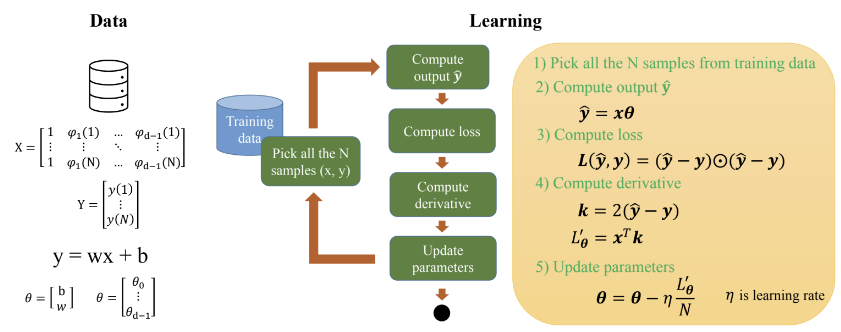

In [5]:
class CustomLinearRegression :
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000) :
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_target - y_pred) ** 2
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            loss_grd = 2*(y_pred - self.y_target) / self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # update weight
            self.theta = self.theta - self.learning_rate * gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss : {loss}')

        return {
          'loss': sum(self.losses) / len(self.losses),
          'weight': self.theta
        }

In [4]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y - y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

# Case 1
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
print(r2score(y_pred, y))

# Case 2
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
print(r2score(y_pred, y))

1.0
-2.235294117647059
